In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab4.ipynb")

# Lab 4: Putting it all together in a mini project

**This lab is an optional group lab.** You can choose to work alone of in a group of up to four students. You are in charge of how you want to work and who you want to work with. Maybe you really want to go through all the steps of the ML process yourself or maybe you want to practice your collaboration skills, it is up to you! Just remember to indicate who your group members are (if any) when you submit on Gradescope. If you choose to work in a group, you only need to use one of your GitHub repos.

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## Submission instructions
rubric={mechanics}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li><a href="https://ubc-mds.github.io/resources_pages/general_lab_instructions/">
      Follow the general lab instructions.</a></li>
  <li><a href="https://github.com/UBC-MDS/public/tree/master/rubric">
      Click here to view a description of the rubrics used to grade the questions</a></li>
  <li>Make at least three commits.</li>
  <li>Push your <code>.ipynb</code> file to your GitHub repository for this lab and upload it to Gradescope.</li>
    <ul>
      <li>Before submitting, make sure you restart the kernel and rerun all cells.</li>
    </ul>
  <li>Also upload a <code>.pdf</code> export of the notebook to facilitate grading of manual questions (preferably WebPDF, you can select two files when uploading to gradescope)</li>
  <li>Don't change any variable names that are given to you, don't move cells around, and don't include any code to install packages in the notebook.</li>
  <li>The data you download for this lab <b>SHOULD NOT BE PUSHED TO YOUR REPOSITORY</b> (there is also a <code>.gitignore</code> in the repo to prevent this).</li>
  <li>Include a clickable link to your GitHub repo for the lab just below this cell
    <ul>
      <li>It should look something like this https://github.ubc.ca/MDS-2020-21/DSCI_531_labX_yourcwl.</li>
    </ul>
  </li>
</ul>
</div>

_Points:_ 2

https://github.ubc.ca/MDS-2022-23/DSCI_573_lab4_mengjun5

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this lab you will be working on an open-ended mini-project, where you will put all the different things you have learned so far in 571 and 573 together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. Since this mini-project is open-ended there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you instead do a bunch of sane things and you have clearly motivated your choices, but still get lower model performance than your friend, don't sweat it.


#### A final note
Finally, the style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "several hours" but not "many hours" is a good guideline for a high quality submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and we hope you enjoy it as well. 

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
rubric={reasoning}

In this mini project, you will pick one of the following problems: 

1. A classification problem of predicting whether a credit card client will default or not. For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

OR 

2. A regression problem of predicting `reviews_per_month`, as a proxy for the popularity of the listing with [New York City Airbnb listings from 2019 dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 
3. Carry out any preliminary preprocessing, if needed (e.g., changing feature names, handling of NaN values etc.)
    
</div>

_Points:_ 3

I would like to try the first one, Default of Credit Card Clients Dataset. Baesd on the previous few months of payment details to predict whether or not clients would do default payment for their credit card. There are 25 variables and all of them are numerical indeed ordinal features are already been transformed. Hence, it is a clean dataset.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/UCI_Credit_Card.csv', index_col=0)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

There is no missing values inside the dataset which is a good news.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 2. Data splitting <a name="2"></a>
rubric={reasoning}

**Your tasks:**

1. Split the data into train and test portions.

> Make the decision on the `test_size` based on the capacity of your laptop. 
    
</div>

_Points:_ 1

In [2]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=573)
train_df.head()

/Users/Daniel/opt/miniconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
7360,20000.0,1,3,1,49,0,0,0,0,-1,...,10790.0,390.0,780.0,1218.0,1285.0,608.0,390.0,780.0,0.0,0
16849,20000.0,1,3,2,40,0,0,0,0,0,...,19800.0,20000.0,0.0,1291.0,1478.0,1200.0,400.0,0.0,0.0,0
29593,30000.0,1,1,2,49,0,0,0,2,0,...,28277.0,20390.0,20555.0,1500.0,4500.0,0.0,900.0,1000.0,2000.0,0
20637,100000.0,1,3,2,30,0,0,0,0,0,...,87919.0,75386.0,69410.0,3435.0,4608.0,25140.0,2566.0,2375.0,4621.0,0
26276,280000.0,2,1,1,37,-1,-1,-1,-1,0,...,1028.0,889.0,698.0,168.0,786.0,1028.0,698.0,0.0,0.0,0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 3. EDA <a name="3"></a>
rubric={viz,reasoning}
    
Perform exploratory data analysis on the train set.

**Your tasks:**

1. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
2. Summarize your initial observations about the data. 
3. Pick appropriate metric/metrics for assessment. 
    
</div>

_Points:_ 6

_Type your answer here, replacing this text._

In [5]:
# no missing values
# the scale bewteen features are quite different thus we have to scale them
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
# All features are numerical
len(train_df.select_dtypes(np.number).columns.to_list())

24

In [7]:
# it seems like only Repayment status have positive linear relationship on default payment
train_df.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
LIMIT_BAL,1.000000,0.024490,-0.216407,-0.109590,0.143968,-0.275985,-0.305426,-0.292573,-0.271174,-0.251839,...,0.291889,0.291701,0.285177,0.204001,0.177676,0.220579,0.204238,0.217814,0.221596,-0.152036
SEX,0.024490,1.000000,0.015441,-0.033212,-0.093213,-0.059800,-0.068644,-0.065268,-0.061520,-0.053919,...,-0.022722,-0.017778,-0.016033,0.001288,-0.003160,-0.014493,-0.003552,0.002061,-0.004869,-0.043249
EDUCATION,-0.216407,0.015441,1.000000,-0.146852,0.178022,0.105682,0.120382,0.112860,0.107889,0.097262,...,-0.001175,-0.008245,-0.010244,-0.038111,-0.024469,-0.040471,-0.038948,-0.046183,-0.038094,0.028531
MARRIAGE,-0.109590,-0.033212,-0.146852,1.000000,-0.412617,0.021568,0.025687,0.030329,0.031108,0.035576,...,-0.026097,-0.029315,-0.024190,-0.014188,-0.013454,-0.011780,-0.016043,-0.000546,-0.006084,-0.023902
AGE,0.143968,-0.093213,0.178022,-0.412617,1.000000,-0.034744,-0.051740,-0.051209,-0.048260,-0.055840,...,0.048791,0.046742,0.043156,0.023578,0.018398,0.031900,0.018955,0.015755,0.019847,0.017834
PAY_0,-0.275985,-0.059800,0.105682,0.021568,-0.034744,1.000000,0.676966,0.579324,0.542047,0.510024,...,0.179414,0.183417,0.179296,-0.085359,-0.070323,-0.072820,-0.063170,-0.065033,-0.062603,0.322774
PAY_2,-0.305426,-0.068644,0.120382,0.025687,-0.051740,0.676966,1.000000,0.766987,0.663727,0.621106,...,0.220286,0.221782,0.218538,-0.082964,-0.056442,-0.059351,-0.045036,-0.044701,-0.039265,0.259362
PAY_3,-0.292573,-0.065268,0.112860,0.030329,-0.051209,0.579324,0.766987,1.000000,0.779901,0.689222,...,0.225268,0.224858,0.222973,-0.000382,-0.067392,-0.056403,-0.045656,-0.038513,-0.039144,0.234128
PAY_4,-0.271174,-0.061520,0.107889,0.031108,-0.048260,0.542047,0.663727,0.779901,1.000000,0.821115,...,0.243705,0.242337,0.239775,-0.010620,-0.001520,-0.071814,-0.042981,-0.033957,-0.029972,0.218128
PAY_5,-0.251839,-0.053919,0.097262,0.035576,-0.055840,0.510024,0.621106,0.689222,0.821115,1.000000,...,0.269664,0.268674,0.262102,-0.007645,-0.003067,0.007842,-0.060786,-0.033913,-0.023509,0.204428


(array([18718.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  5282.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

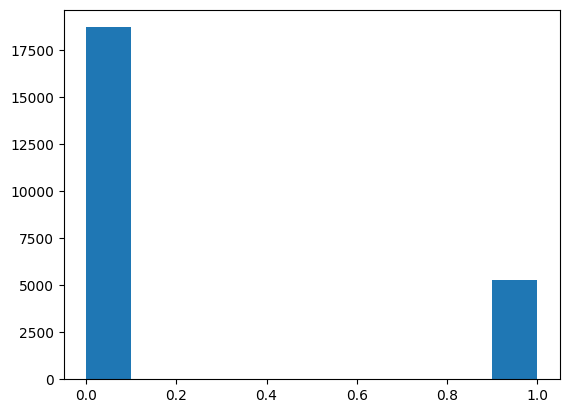

In [8]:
#our target is imbalanced 
import matplotlib.pyplot as plt 
plt.hist(x = train_df['default.payment.next.month'], density=False)

In [3]:
import altair as alt
alt.data_transformers.enable('data_server')
# since we have many similar features thus I just pick one of them as a sample
alt.Chart(train_df[['LIMIT_BAL','EDUCATION','AGE','PAY_2','BILL_AMT2', 'PAY_AMT2']]).mark_bar().encode(
    alt.X(alt.repeat(), type='quantitative', bin=alt.Bin(maxbins=30)),
    y='count()',
).properties(
    width=200,
    height=100
).repeat(
    ['LIMIT_BAL','EDUCATION','AGE','PAY_2','BILL_AMT2', 'PAY_AMT2'], columns=2
)

alt.RepeatChart(...)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 4. Feature engineering (Challenging)
rubric={reasoning}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing.
    
</div>

_Points:_ 0.5

In [10]:
# As I noticed there are many features that have similar meanings like bill_amt1 to 6, and pay amt 1 to 6
# Therefore, I decided to get a average of them

train_df['avg_bill_amt'] = train_df.loc[:, 'BILL_AMT1':'BILL_AMT6'].mean(axis=1)
train_df['avg_pay_amt'] = train_df.loc[:, 'PAY_AMT1':'PAY_AMT6'].mean(axis=1)
# the bill amt is the bill statement, and the pay amt is the payment clients have paied this month, 
# thus, I am going to subtract them to get how much the bill statement left
train_df['avg_bill_left'] = train_df['avg_bill_amt'] - train_df['avg_pay_amt']
train_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,avg_bill_amt,avg_pay_amt,avg_bill_left
ID,,,,,,,,,,,,,,,,,,,,,
7360,20000.0,1,3,1,49,0,0,0,0,-1,...,1218.0,1285.0,608.0,390.0,780.0,0.0,0,8541.333333,713.500000,7827.833333
16849,20000.0,1,3,2,40,0,0,0,0,0,...,1291.0,1478.0,1200.0,400.0,0.0,0.0,0,15608.833333,728.166667,14880.666667
29593,30000.0,1,1,2,49,0,0,0,2,0,...,1500.0,4500.0,0.0,900.0,1000.0,2000.0,0,24886.500000,1650.000000,23236.500000
20637,100000.0,1,3,2,30,0,0,0,0,0,...,3435.0,4608.0,25140.0,2566.0,2375.0,4621.0,0,80039.833333,7124.166667,72915.666667
26276,280000.0,2,1,1,37,-1,-1,-1,-1,0,...,168.0,786.0,1028.0,698.0,0.0,0.0,0,717.000000,446.666667,270.333333


In [11]:
# doing the same for the test data
test_df['avg_bill_amt'] = test_df.loc[:, 'BILL_AMT1':'BILL_AMT6'].mean(axis=1)
test_df['avg_pay_amt'] = test_df.loc[:, 'PAY_AMT1':'PAY_AMT6'].mean(axis=1)
test_df['avg_bill_left'] = test_df['avg_bill_amt'] - test_df['avg_pay_amt']
test_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,avg_bill_amt,avg_pay_amt,avg_bill_left
ID,,,,,,,,,,,,,,,,,,,,,
15299,380000.0,2,1,2,31,0,0,2,0,0,...,5700.0,2500.0,3500.0,5000.0,5000.0,3400.0,0,71621.666667,4183.333333,67438.333333
13204,220000.0,2,1,2,24,0,0,0,0,0,...,2017.0,1965.0,2000.0,2210.0,2500.0,2339.0,0,54834.666667,2171.833333,52662.833333
1737,80000.0,2,2,2,29,2,0,0,0,0,...,2661.0,2509.0,2500.0,3000.0,3000.0,3000.0,1,70949.000000,2778.333333,68170.666667
9618,140000.0,1,1,2,37,-1,-1,-1,-1,-1,...,291.0,291.0,291.0,291.0,441.0,291.0,0,316.000000,316.000000,0.000000
5575,20000.0,2,2,2,25,0,0,0,0,0,...,1293.0,1397.0,836.0,1653.0,565.0,206.0,1,22468.500000,991.666667,21476.833333


In [12]:
#split train and test data set into X and y
X_train, y_train = train_df.drop(columns=['default.payment.next.month']), train_df['default.payment.next.month']
X_test, y_test = test_df.drop(columns=['default.payment.next.month']), test_df['default.payment.next.month']

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 5. Preprocessing and transformations <a name="5"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 
    
</div>

_Points:_ 4

In [13]:
len(X_train.columns)

26

In [14]:
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,avg_bill_amt,avg_pay_amt,avg_bill_left
ID,,,,,,,,,,,,,,,,,,,,,
7360,20000.0,1,3,1,49,0,0,0,0,-1,...,780.0,1218.0,1285.0,608.0,390.0,780.0,0.0,8541.333333,713.500000,7827.833333
16849,20000.0,1,3,2,40,0,0,0,0,0,...,0.0,1291.0,1478.0,1200.0,400.0,0.0,0.0,15608.833333,728.166667,14880.666667
29593,30000.0,1,1,2,49,0,0,0,2,0,...,20555.0,1500.0,4500.0,0.0,900.0,1000.0,2000.0,24886.500000,1650.000000,23236.500000
20637,100000.0,1,3,2,30,0,0,0,0,0,...,69410.0,3435.0,4608.0,25140.0,2566.0,2375.0,4621.0,80039.833333,7124.166667,72915.666667
26276,280000.0,2,1,1,37,-1,-1,-1,-1,0,...,698.0,168.0,786.0,1028.0,698.0,0.0,0.0,717.000000,446.666667,270.333333


In [15]:
numeric_features = ['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'avg_bill_amt', 'avg_pay_amt', 'avg_bill_left']

#SEX: Gender (1=male, 2=female)
binary_features = ['SEX']
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
# MARRIAGE: Marital status (1=married, 2=single, 3=others)
# PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 
# 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
# since the features are already in numerical order, we do not need ordinal encoding
ordinal_features = ['EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

preprocessor = make_column_transformer(
    (OneHotEncoder(drop = "if_binary", handle_unknown="ignore", sparse=False), binary_features),
    (StandardScaler(), numeric_features),
    ('passthrough', ordinal_features)
)

transformed_X = preprocessor.fit_transform(X_train)
pd.DataFrame(transformed_X).head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,-1.134750,1.472763,-0.506071,-0.518383,-0.484336,-0.503422,-0.656534,-0.640658,-0.276910,...,-0.470548,-0.526459,3.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0
1,0.0,-1.134750,0.494186,-0.464977,-0.437462,-0.399819,-0.362569,-0.330983,-0.653907,-0.272330,...,-0.469028,-0.408791,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,-1.057366,1.472763,-0.351946,-0.325155,-0.254487,-0.230049,-0.324508,-0.304760,-0.259217,...,-0.373486,-0.269384,1.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0
3,0.0,-0.515674,-0.593122,0.565909,0.413681,0.441757,0.702330,0.588496,0.525091,-0.137810,...,0.193875,0.559456,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.877247,0.167994,-0.685991,-0.688145,-0.664496,-0.656031,-0.648250,-0.642050,-0.342790,...,-0.498204,-0.652547,1.0,1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 6. Baseline model <a name="6"></a>
rubric={accuracy}

**Your tasks:**
1. Train a baseline model for your task and report its performance.
    
</div>

_Points:_ 2

In [17]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate

cross_val_results = {}
dc_pipe = make_pipeline(preprocessor, DummyClassifier())
cross_val_results['dummy'] = pd.DataFrame(cross_validate(dc_pipe, X_train, y_train, return_train_score=True, cv = 10)).agg(['mean', 'std']).round(3).T

cross_val_results['dummy']

,mean,std
fit_time,0.009,0.003
score_time,0.002,0.000
test_score,0.780,0.000
train_score,0.780,0.000


the result is kind of high because our data is imblaanced.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 7. Linear models <a name="7"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the regularization hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.
    
</div>

_Points:_ 8

I am going to use ridge() as my linear model

In [18]:
from sklearn.linear_model import RidgeCV
ridgecv_pipe = make_pipeline(preprocessor, RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]))
cross_val_results['ridgecv'] = pd.DataFrame(cross_validate(ridgecv_pipe, X_train, y_train, return_train_score=True, cv = 10)).agg(['mean', 'std']).round(3).T

cross_val_results['ridgecv']

,mean,std
fit_time,0.461,0.073
score_time,0.021,0.022
test_score,0.119,0.012
train_score,0.123,0.001


Our linear model is terrible, hence our data is not linear.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 8. Different models <a name="8"></a>
rubric={accuracy,reasoning}

**Your tasks:**
1. Try out three other models aside from the linear model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat the performance of the linear model? 
    
</div>

_Points:_ 10

I am going to use logistic regression, random forrest, and CatBoost

In [19]:
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

cat_pipe = make_pipeline(preprocessor, CatBoostClassifier(auto_class_weights='Balanced', verbose=0))
cross_val_results['cat boost'] = pd.DataFrame(cross_validate(cat_pipe, X_train, y_train, return_train_score=True, cv = 10)).agg(['mean', 'std']).round(3).T
cross_val_results['cat boost']


,mean,std
fit_time,5.284,0.124
score_time,0.004,0.000
test_score,0.768,0.006
train_score,0.835,0.002


In [20]:
rfc_pipe = make_pipeline(preprocessor, RandomForestClassifier(n_jobs=-1))
cross_val_results['random forest'] = pd.DataFrame(cross_validate(rfc_pipe, X_train, y_train, return_train_score=True, cv = 10)).agg(['mean', 'std']).round(3).T
cross_val_results['random forest']

,mean,std
fit_time,1.233,0.591
score_time,0.025,0.002
test_score,0.815,0.005
train_score,0.999,0.000


In [21]:
logreg_pipe = make_pipeline(preprocessor, LogisticRegression())

cross_val_results['Logistic Regression'] = pd.DataFrame(cross_validate(logreg_pipe, X_train, y_train, return_train_score=True, cv = 10)).agg(['mean', 'std']).round(3).T

cross_val_results['Logistic Regression']


,mean,std
fit_time,0.102,0.020
score_time,0.003,0.001
test_score,0.810,0.005
train_score,0.811,0.001


For now, logistic regression seems like the best model

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 9. Feature selection (Challenging)
rubric={reasoning}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV`, forward selection or L1 regularization for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises unless you think there are other benefits with using less features.
    
</div>

_Points:_ 0.5

_Type your answer here, replacing this text._

In [22]:
...

Ellipsis

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 10. Hyperparameter optimization
rubric={accuracy,reasoning}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 
    
</div>

_Points:_ 6

I am going to use randomized search for all three of the models I chose

In [23]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'catboostclassifier__learning_rate': [0.03, 0.1],
        'catboostclassifier__depth': [4, 6, 10],
        'catboostclassifier__auto_class_weights': ['Balanced', 'SqrtBalanced', 'None']}
cat_search = RandomizedSearchCV(cat_pipe, param_distributions=grid, return_train_score=True, n_jobs = -1)
cat_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('onehotencoder',
                                                                               OneHotEncoder(drop='if_binary',
                                                                                             handle_unknown='ignore',
                                                                                             sparse=False),
                                                                               ['SEX']),
                                                                              ('standardscaler',
                                                                               StandardScaler(),
                                                                               ['LIMIT_BAL',
                                                                                'AGE',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3...
                                                                                'MARRIAGE',
                                                                                'PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6'])])),
                                             ('catboostclassifier',
                                              <catboost.core.CatBoostClassifier object at 0x16b5edfc0>)]),
                   n_jobs=-1,
                   param_distributions={'catboostclassifier__auto_class_weights': ['Balanced',
                                                                                   'SqrtBalanced',
                                                                                   'None'],
                                        'catboostclassifier__depth': [4, 6, 10],
                                        'catboostclassifier__learning_rate': [0.03,
                                                                              0.1]},
                   return_train_score=True)

In [24]:
cat_search.best_params_

{'catboostclassifier__learning_rate': 0.03,
 'catboostclassifier__depth': 4,
 'catboostclassifier__auto_class_weights': 'None'}

In [25]:
cat_best = cat_search.best_estimator_
cross_val_results['best catboost'] = pd.DataFrame(cross_validate(cat_best, X_train, y_train, return_train_score=True, cv = 10)).agg(['mean', 'std']).round(3).T

cross_val_results['best catboost']


,mean,std
fit_time,4.243,0.217
score_time,0.005,0.001
test_score,0.820,0.006
train_score,0.832,0.001


In [26]:
param_grid = { 
    'randomforestclassifier__n_estimators': [50, 100],
    'randomforestclassifier__max_depth' : [4, 6, 10],
    'randomforestclassifier__class_weight': ['balanced', None]
}

rfc_search = RandomizedSearchCV(rfc_pipe, param_distributions=param_grid, return_train_score=True, n_jobs=-1)
rfc_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('onehotencoder',
                                                                               OneHotEncoder(drop='if_binary',
                                                                                             handle_unknown='ignore',
                                                                                             sparse=False),
                                                                               ['SEX']),
                                                                              ('standardscaler',
                                                                               StandardScaler(),
                                                                               ['LIMIT_BAL',
                                                                                'AGE',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3...
                                                                               'passthrough',
                                                                               ['EDUCATION',
                                                                                'MARRIAGE',
                                                                                'PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6'])])),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(n_jobs=-1))]),
                   n_jobs=-1,
                   param_distributions={'randomforestclassifier__class_weight': ['balanced',
                                                                                 None],
                                        'randomforestclassifier__max_depth': [4,
                                                                              6,
                                                                              10],
                                        'randomforestclassifier__n_estimators': [50,
                                                                                 100]},
                   return_train_score=True)

In [27]:
rfc_search.best_params_

{'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__class_weight': None}

In [28]:
cross_val_results['best Random Forest'] = pd.DataFrame(cross_validate(rfc_search.best_estimator_, X_train, y_train, return_train_score=True, cv = 10)).agg(['mean', 'std']).round(3).T

cross_val_results['best Random Forest']

,mean,std
fit_time,0.734,0.051
score_time,0.019,0.002
test_score,0.818,0.006
train_score,0.860,0.001


In [29]:
param_dist2 = {
    "logisticregression__C": np.logspace(-3,3,7)
}

logreg_search = RandomizedSearchCV(logreg_pipe, param_distributions=param_dist2, return_train_score=True, n_jobs=-1)
logreg_search.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('onehotencoder',
                                                                               OneHotEncoder(drop='if_binary',
                                                                                             handle_unknown='ignore',
                                                                                             sparse=False),
                                                                               ['SEX']),
                                                                              ('standardscaler',
                                                                               StandardScaler(),
                                                                               ['LIMIT_BAL',
                                                                                'AGE',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3...
                                                                                'PAY_AMT5',
                                                                                'PAY_AMT6',
                                                                                'avg_bill_amt',
                                                                                'avg_pay_amt',
                                                                                'avg_bill_left']),
                                                                              ('passthrough',
                                                                               'passthrough',
                                                                               ['EDUCATION',
                                                                                'MARRIAGE',
                                                                                'PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6'])])),
                                             ('logisticregression',
                                              LogisticRegression())]),
                   n_jobs=-1,
                   param_distributions={'logisticregression__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
                   return_train_score=True)

In [30]:
logreg_search.best_params_

{'logisticregression__C': 10.0}

In [31]:
cross_val_results['best Logistic Regression'] = pd.DataFrame(cross_validate(logreg_search.best_estimator_, X_train, y_train, return_train_score=True, cv = 10)).agg(['mean', 'std']).round(3).T

cross_val_results['best Logistic Regression']

,mean,std
fit_time,0.115,0.017
score_time,0.004,0.002
test_score,0.811,0.005
train_score,0.811,0.001


As we can see from the above table, the best Random Forest model performs the best with no overfitting problem.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 11. Interpretation and feature importances <a name="1"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 
    
</div>

_Points:_ 8

In [33]:
feature_names = (
    binary_features + numeric_features + ordinal_features
)

1. I will examine the best random forest model since it is the best by using eli5
2. it seems like that random forest model think th repayment status are the most important feature, then the second important feature is the average previous payment made (I am made it!!! OWO!), then the last payment. Therefore, my model think people who have good record of repayment status and payed good for previous month payment would more likely to set the default payment for next month.

In [34]:
import eli5
eli5.explain_weights(rfc_search.best_estimator_.named_steps['randomforestclassifier'],  feature_names=feature_names)

Weight,Feature
0.2463 ± 0.2434,PAY_0
0.1138 ± 0.2479,PAY_2
0.0537 ± 0.1510,PAY_3
0.0480 ± 0.1277,PAY_5
0.0467 ± 0.1319,PAY_4
0.0428 ± 0.0417,avg_pay_amt
0.0336 ± 0.0454,PAY_AMT1
0.0318 ± 0.0272,LIMIT_BAL
0.0290 ± 0.0193,avg_bill_amt
0.0287 ± 0.0164,BILL_AMT1


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 12. Results on the test set <a name="12"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain them with SHAP force plots.  
    
</div>

_Points:_ 6

1. the test score is 0.823
2. the test score agress with the validation score from before. I am very trust my result since my model performs great in training data, then the feature it used as the most important features are making sense to determine whether or not the person will set the default payment for next month. I do not think I have had issues with optimization bias since my test score is even better than my validation score.
3. pay0 to 6 and ave_pay_amt is pushing positive.

In [35]:
rfc_search.best_estimator_.score(X_test, y_test)

0.8231666666666667

In [36]:
import shap
rfc_explainer = shap.TreeExplainer(rfc_search.best_estimator_.named_steps['randomforestclassifier'])
rfc_shap_value = rfc_explainer.shap_values(X_test)
rfc_shap_value[1].shape

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(6000, 26)

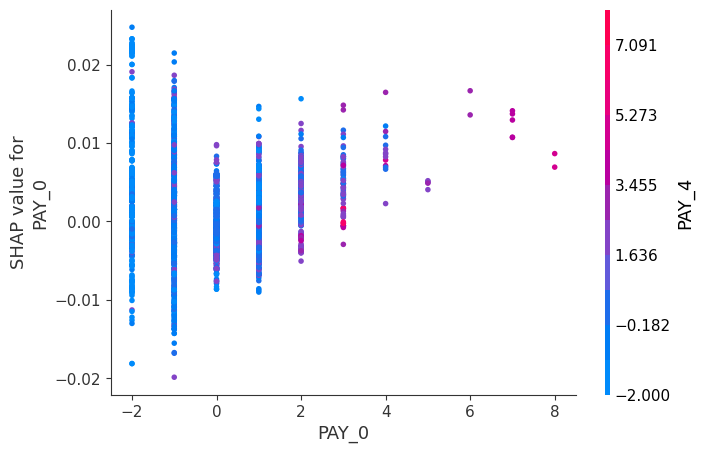

In [37]:
shap.dependence_plot("PAY_0", rfc_shap_value[1], X_test)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 13. Summary of results <a name="13"></a>
rubric={reasoning}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook.
    
</div>

_Points:_ 8

1. Below
2. The best model here is the Random Forest Classifier with n_estimators = 100, max_depth=6, and class_weight=None. The Final test score is 0.823 which is not bad at all and there is no overfitting for my model in validation score hence it can be trust for more unseen data. Moreover, the feature, that are repayment status and payment made previously, used as the most important features are making sense to determine whether or not the person will set the default payment for next month. 
3. I can actuaully make a average of the repayment status, which should improve the model since the repayment status is the most important deature in my best model. 
4. 0.823 with defualt accuracy metric

In [48]:
final_result = pd.DataFrame({"best model": ["Random Forest Classifier", None, None], "Hyperparameter" : ["n_estimators = 100", "max_depth = 6", 
"class weight = None"], "test score" : ["0.823", None, None], "most important features": ["PAY_*", 'avg_pay_amt', "PAY_AMT1"], "metric": ['accuracy', None, None]})
final_result

,best model,Hyperparameter,test score,most important features,metric
0,Random Forest Classifier,n_estimators = 100,0.823,PAY_*,accuracy
1,None,max_depth = 6,None,avg_pay_amt,None
2,None,class weight = None,None,PAY_AMT1,None


In [47]:
pd.concat(cross_val_results, axis=1)

dummy        ridgecv        cat boost        random forest  \
              mean    std    mean    std      mean    std          mean   
fit_time     0.009  0.003   0.461  0.073     5.284  0.124         1.233   
score_time   0.002  0.000   0.021  0.022     0.004  0.000         0.025   
test_score   0.780  0.000   0.119  0.012     0.768  0.006         0.815   
train_score  0.780  0.000   0.123  0.001     0.835  0.002         0.999   

                   Logistic Regression        best catboost         \
               std                mean    std          mean    std   
fit_time     0.591               0.102  0.020         4.243  0.217   
score_time   0.002               0.003  0.001         0.005  0.001   
test_score   0.005               0.810  0.005         0.820  0.006   
train_score  0.000               0.811  0.001         0.832  0.001   

            best Random Forest        best Logistic Regression         
                          mean    std                     mean    std  
fit_time                 0.734  0.051                    0.115  0.017  
score_time               0.019  0.002                    0.004  0.002  
test_score               0.818  0.006                    0.811  0.005  
train_score              0.860  0.001                    0.811  0.001

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 14. Creating a data analysis pipeline (Challenging)
rubric={reasoning}

**Your tasks:**
- In 522 you learned how build a reproducible data analysis pipeline. Convert this notebook into scripts and create a reproducible data analysis pipeline with appropriate documentation. Submit your project folder in addition to this notebook on GitHub and briefly comment on your organization in the text box below.
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 15. Your takeaway from the course (Challenging)
rubric={reasoning}

**Your tasks:**

What is your biggest takeaway from this course? 
    
</div>

_Points:_ 0.25

I have learned many models, learned feature selections, regularization. etc.

<!-- END QUESTION -->

<div class="alert alert-danger" style="color:black">
    
**Restart, run all and export a PDF before submitting**
    
Before submitting,
don't forget to run all cells in your notebook
to make sure there are no errors
and so that the TAs can see your plots on Gradescope.
You can do this by clicking the ▶▶ button
or going to `Kernel -> Restart Kernel and Run All Cells...` in the menu.
This is not only important for MDS,
but a good habit you should get into before ever committing a notebook to GitHub,
so that your collaborators can run it from top to bottom
without issues.
    
After running all the cells,
export a PDF of the notebook (preferably the WebPDF export)
and upload this PDF together with the ipynb file to Gradescope
(you can select two files when uploading to Gradescope)
</div>

---

## Help us improve the labs

The MDS program is continually looking to improve our courses, including lab questions and content. The following optional questions will not affect your grade in any way nor will they be used for anything other than program improvement:

1. Approximately how many hours did you spend working or thinking about this assignment (including lab time)?

#Ans:

2. Do you have any feedback on the lab you be willing to share? For example, any part or question that you particularly liked or disliked?

#Ans: